In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

sjerplot = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefilelatlong/dpdshapefilelatlong.shp')
nonzero = sjerplot.loc[~(sjerplot["X"] == 0) & ~(sjerplot["Y"] == 0) & ~(sjerplot["Cancelled"] != 0)].copy()
nonzero = nonzero.loc[nonzero["Source"] != "Self Initiated"]

print(nonzero.shape) 
nonzero.head(6)

(122803, 15)


,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (2055372.00000 818537.00000)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (2024961.00000 815902.00000)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (2038061.00000 841530.00000)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (2045947.00000 796806.00000)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (2037016.00000 818259.00000)
5,21000011,None,1/1/2021,12:04:08AM,Wireless 911 Call,3,SUSPICIOUS PERSON,100 LANDSBURY DR,2007390,806379,D3,321,Resolved Without Report,0,POINT (2007390.00000 806379.00000)


In [ ]:
from osgeo import gdal

In [ ]:
newnonzero = gpd.GeoDataFrame.set_crs(nonzero, crs="ESRI:102719", allow_override=True)
newnonzero

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (inf inf)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (inf inf)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (inf inf)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (inf inf)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (inf inf)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331059,21478329,None,12/31/2021,11:49:24PM,Self Initiated,4,PROPERTY CHECK,900 LAMBETH CIR,2014984,821360,D3,313,Resolved Without Report,0,POINT (inf inf)
331060,21478332,None,12/31/2021,11:49:51PM,Self Initiated,5,DIRECTED PATROL,W CHAPEL HILL ST/S BUCHANAN BLVD,2025100,817723,D3,312,Resolved Without Report,0,POINT (inf inf)
331064,21478336,None,12/31/2021,11:51:01PM,Wireless 911 Call,3,TRESPASS OR UNWANTED,1600 T W ALEXANDER DR,2045831,791379,D4,423,Unfounded,0,POINT (inf inf)
331065,21478338,None,12/31/2021,11:51:22PM,Wireless 911 Call,2,UNKNOWN PROBLEM POLICE,3700 MERIWETHER DR,2032628,832985,D2,223,Resolved Without Report,0,POINT (inf inf)


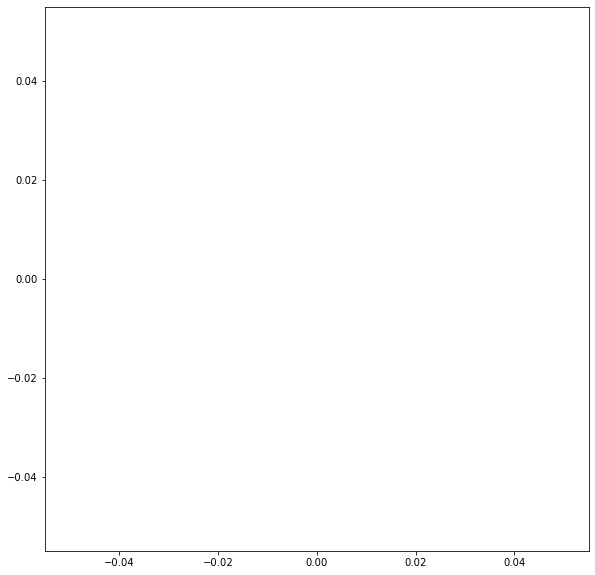

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
newnonzero.plot(ax = ax, alpha = 0.5, aspect=1)
plt.show()

In [ ]:
nonzero.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 278274 entries, 0 to 331068
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Event Numb  278274 non-null  int64   
 1   Case Numbe  44962 non-null   object  
 2   Call Date   278274 non-null  object  
 3   Call Time   278274 non-null  object  
 4   Source      278274 non-null  object  
 5   Priority    277729 non-null  object  
 6   Nature      278274 non-null  object  
 7   Address     278274 non-null  object  
 8   X           278274 non-null  int64   
 9   Y           278274 non-null  int64   
 10  District    275678 non-null  object  
 11  Beat        275660 non-null  object  
 12  Dispositio  278274 non-null  object  
 13  Cancelled   278274 non-null  int64   
 14  geometry    278274 non-null  geometry
dtypes: geometry(1), int64(4), object(10)
memory usage: 34.0+ MB


In [ ]:
base = newnonzero.plot()
policebeats.plot(ax = base)

NameError: name 'gdf' is not defined

In [ ]:
nonzero["Source"].value_counts()

Self Initiated                   155471
Wireless 911 Call                 57069
Phone Call                        38132
Alarm Line                         9386
E-911                              8741
ASAP Alarm Interface               3806
{Other}                            2525
Language Line                      1442
Report Only                         816
Radio                               412
Texting                             287
DCI Message                         141
In House Translation                 33
(blank)                               7
Telephone Device For The Deaf         6
Name: Source, dtype: int64

In [ ]:
type(nonzero)

geopandas.geodataframe.GeoDataFrame

In [ ]:
nonzero.total_bounds


array([1.96911200e+06, 7.46293000e+05, 2.06715984e+08, 8.68232260e+07])

In [ ]:
nonzero.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
nonzero.geom_type

0         Point
1         Point
2         Point
3         Point
4         Point
          ...  
331059    Point
331060    Point
331064    Point
331065    Point
331068    Point
Length: 278274, dtype: object

In [ ]:
nonzero.shape

(278274, 15)

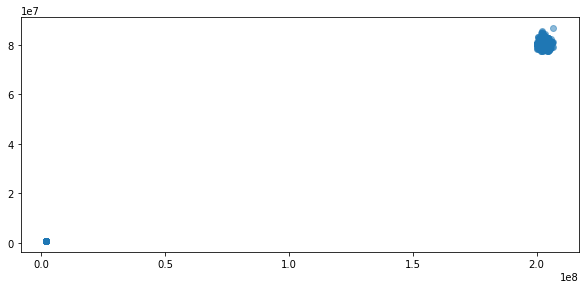

In [ ]:
# plot the data using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))
nonzero.plot(ax = ax, alpha = 0.5, aspect=1)
plt.show()

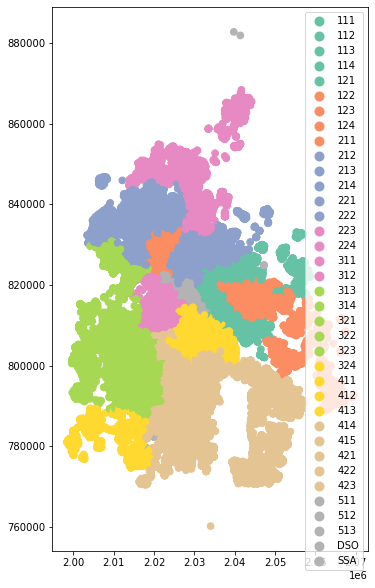

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))

# quickly plot the data adding a legend
nonzero.plot(column='Beat', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=45, 
                         cmap="Set2", ax=ax, aspect=1);

In [ ]:
policebeats = gpd.read_file('/Users/erikrobertsson/Desktop/Police_Beats/Police_Beats.shp')
# policebeats2 = policebeats.to_crs("SR-ORG:12")
# law_beat_shapefile.to_file("path/to/new/output/file.shp")
policebeats.head()

,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,LAWBEAT,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,geometry
0,1,29657.869141,None,None,D2,299,SSA,None,2.075708e+07,29657.868615,"POLYGON ((-78.86588 36.18066, -78.86602 36.180..."
1,2,18915.720703,None,None,D2,299,SSA,None,2.086135e+06,18915.724912,"POLYGON ((-78.85731 36.17823, -78.85731 36.178..."
2,3,1193.728027,None,None,D2,299,SSA,None,6.682308e+04,1193.727878,"POLYGON ((-78.86585 36.18027, -78.86572 36.180..."
3,4,1308.963013,None,None,DSO,999,DSO,None,6.932677e+04,1308.962953,"POLYGON ((-78.86585 36.18027, -78.86635 36.179..."
4,5,1467.506958,None,None,DSO,999,DSO,None,8.512911e+04,1467.506955,"POLYGON ((-78.86452 36.17903, -78.86448 36.179..."


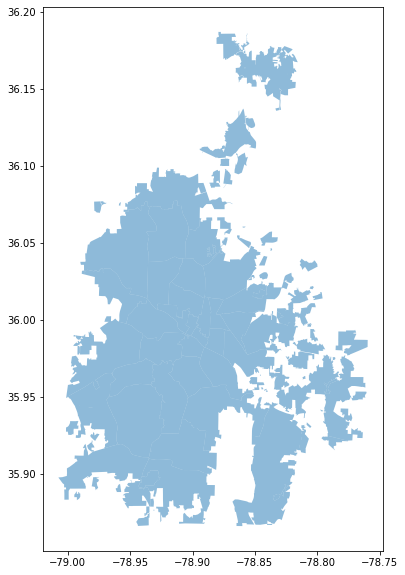

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
policebeats.plot(ax = ax, alpha = 0.5)
plt.show()

In [ ]:
policebeats.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
policebeats = policebeats.to_crs("4326")
policebeats.head()

,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,LAWBEAT,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,geometry
0,1,29657.869141,None,None,D2,299,SSA,None,2.075708e+07,29657.868615,"POLYGON ((-78.86588 36.18066, -78.86602 36.180..."
1,2,18915.720703,None,None,D2,299,SSA,None,2.086135e+06,18915.724912,"POLYGON ((-78.85731 36.17823, -78.85731 36.178..."
2,3,1193.728027,None,None,D2,299,SSA,None,6.682308e+04,1193.727878,"POLYGON ((-78.86585 36.18027, -78.86572 36.180..."
3,4,1308.963013,None,None,DSO,999,DSO,None,6.932677e+04,1308.962953,"POLYGON ((-78.86585 36.18027, -78.86635 36.179..."
4,5,1467.506958,None,None,DSO,999,DSO,None,8.512911e+04,1467.506955,"POLYGON ((-78.86452 36.17903, -78.86448 36.179..."


In [ ]:
nonzero = gpd.GeoDataFrame(nonzero, geometry=gpd.points_from_xy(nonzero.X, nonzero.Y))
nonzero = nonzero.set_crs("epsg:2264")
nonzero.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (2055372.000 818537.000)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (2024961.000 815902.000)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (2038061.000 841530.000)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (2045947.000 796806.000)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (2037016.000 818259.000)


In [ ]:
nonzero = nonzero.to_crs("EPSG:4326")
nonzero.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (-78.81280 35.99886)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (-78.91562 35.99174)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (-78.87123 36.06210)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (-78.84478 35.93921)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (-78.87486 35.99818)


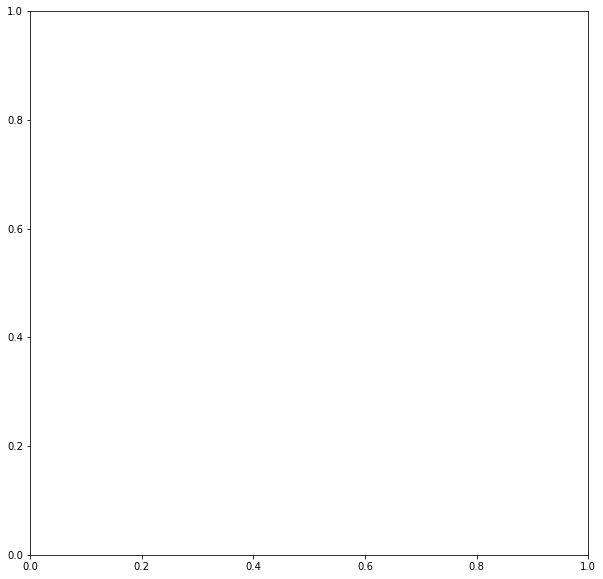

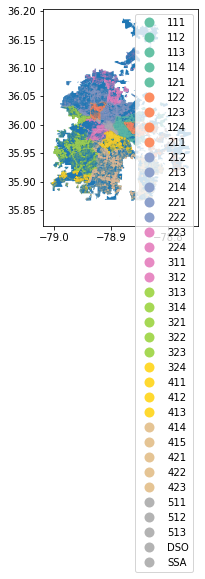

In [143]:
fig, ax = plt.subplots(figsize = (10,10))

# quickly plot the data adding a legend
# base = policebeats.plot()
nonzero.plot(column='Beat', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.001, 
                         cmap="Set2", ax=policebeats.plot(), aspect=1);

<AxesSubplot:>

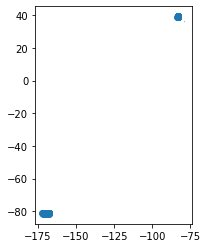

In [ ]:
base = policebeats.plot()
nonzero.plot(ax = base)

In [ ]:
beatswithcalls = nonzero.sjoin(policebeats, how="inner", predicate='contains')
beatswithcalls.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,...,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,LAWBEAT,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen
